 ## Report: CarOnHill

## Intro

* Problem: **Car On Hill** (gamma: 0.95, horizon: 100)
* Algorithms: **FQI** (50 iterations)
* 20 **datasets** of 1000 episodes, have been generated using 20 different random seeds.
* Each experiment has been run on all the 20 datasets/seeds and its results have been averaged.

In [1]:
%matplotlib inline

import base
from postprocess import *

np.set_printoptions(suppress=True)

Using Theano backend.


In [2]:
cd caronhill/data1k/

/home/deep/germano/trl/caronhill/data1k


## Summary of performance & times

The next table shows the summary of all the experiments run.

For each experiment, its mean performance (discounted J), time and their confidence and std are shown.

In [3]:
_, data_fqi = postprocess('fqi')
data_fqi = data_fqi.astype(np.dtype([('path', 'U50')] + perf_time))
df_fqi = pd.DataFrame(data_fqi)
summary = df_fqi.sort_values(['performance', 'time'], ascending=[False, True])
summary

,path,performance,time,p_conf,t_conf,p_std,t_std
0,extra_trees_ar,0.263401,131.753412,0.007424,1.033190,0.016938,2.357433
3,extra_trees,0.226690,154.161691,0.017953,1.086902,0.040964,2.479987
13,sample_weight_ar,0.113221,1878.019048,0.026254,92.855308,0.059903,211.868144
6,nn4_2,0.100652,171.278658,0.035603,5.312611,0.081236,12.121795
11,nn4_ar,0.097290,529.416724,0.051852,19.616568,0.118311,44.759164
8,nn4_3,0.082154,204.767786,0.038878,5.494904,0.088708,12.537734
2,nn4_1,0.069897,184.167299,0.049451,5.625426,0.112833,12.835545
10,n20,0.050003,192.320695,0.034269,13.105236,0.078192,29.902243
5,nn4_4,0.047437,165.082568,0.063387,5.524664,0.144631,12.605638
9,n50,0.036549,394.728351,0.017104,8.151522,0.039025,18.599345


## Analyzing Datasets & seeds

The next table shows some statistics about datasets/seeds.

For each dataset:
 * Mean performance of the dataset on all the runs with neural networks
 * Confidence and std of the performance
 * Number of successful, failed and zero-reward episodes
 * Size of dataset (total steps)

In [4]:
data = np.zeros((20, 7))
n = 1000

for i in range(20):
    perf, _, conf, _, std, _ = list(average_experiment_runs('fqi/nn*', 'experiment-%d.h5' % i))

    ds = utils.load_dataset('dataset-%d.h5' % i)
    succ = np.count_nonzero(ds.reward==+1)
    fail = np.count_nonzero(ds.reward==-1)
    zero = n - succ - fail
    
    #perf_time.extend((succ, fail, zero, len(ds)))
    data[i] = (perf, conf, std, succ, fail, zero, len(ds))
    
d = pd.DataFrame(data, columns=['perf', 'p_conf', 'p_std', 'succ', 'fail', 'zero', 'size'])

In [5]:
d.sort_values(by='perf', ascending=False)

,perf,p_conf,p_std,succ,fail,zero,size
18,0.125267,0.067399,0.090980,16.0,853.0,131.0,56279.0
5,0.110869,0.073825,0.099655,12.0,847.0,141.0,55027.0
7,0.091897,0.034096,0.046026,17.0,810.0,173.0,56817.0
2,0.087957,0.079991,0.107978,14.0,850.0,136.0,56772.0
4,0.085384,0.076659,0.103480,11.0,841.0,148.0,55648.0
11,0.082633,0.089335,0.120591,11.0,840.0,149.0,55920.0
9,0.069099,0.077648,0.104815,18.0,824.0,158.0,55390.0
19,0.068340,0.066965,0.090394,8.0,855.0,137.0,54911.0
10,0.067973,0.073792,0.099609,9.0,829.0,162.0,56304.0
16,0.065293,0.080231,0.108302,12.0,849.0,139.0,55074.0


In [6]:
from trl import regressor
from matplotlib import pyplot as plt

def get_data(q, n=100):
    s = int(n**0.5)
    n = s*s
    S = utils.make_grid(np.linspace(-1, 1, s), np.linspace(-3, 3, s))
    SA = np.zeros((n, 3))
    SA[:, 0:2] = S
    SA[:, 2] = -4
    a = q(SA).ravel()
    SA[:, 2] = 4
    b = q(SA).ravel()
    
    return n, s, a, b

def get_policy_grid(q, n=100):
    n, s, a, b = get_data(q, n)
    x = np.zeros(n)
    x[a>b] = -4
    x[a==b] = 0
    x[a<b] = 4
    return np.flipud(x.reshape(s,s).T)

def get_q_grid(q, n=100):
    n, s, a, b = get_data(q, n)
    x = b-a
    return np.flipud(x.reshape(s,s).T)

def get_score_grid(paths):
    score = 0
    for path in paths:
        trace = utils.load_dataset(path, 'trace')
        score += trace.metrics[:, 1]

    score /= len(paths)

    n = len(score)
    s = int(n**0.5)
    return np.flipud(score.reshape(s, s).T)

def show(grid, title='', subplot=111, cmap='seismic', **kwargs):
    ax = plt.subplot(subplot)
    plt.imshow(grid, aspect='auto', cmap=cmap, extent=[-1,1, -3,3], **kwargs)#, vmin=-4, vmax=4)
    plt.xlabel('position')
    plt.ylabel('speed')
    plt.colorbar()
    plt.title(title)
    
def load_regressors(paths, name='q'):
    return [regressor.load_regressor(path, 'q') for path in paths]
    
def plot_stuff(paths, resolution=400):
    for i, path in enumerate(paths):
        reg = regressor.load_regressor(path, 'q')
        summary = utils.load_dataset(path, 'summary')
        print('Summary (time, avgJ, discountedJ):', summary)
        
        plt.figure(figsize=(10,5))
        show(get_q_grid(reg, n=resolution), 'Q', 121, vmin=-2, vmax=2)
        show(get_policy_grid(reg, n=resolution), 'policy', 122, vmin=-4, vmax=4)
        
        plt.show()
        
class MeanRegressor:
    
    def __init__(self, regressors):
        self.regressors = regressors
        
    def predict(self, x):
        y = 0
        for reg in self.regressors:
            y += reg(x)
        return y / len(self.regressors)
    
    def __call__(self, *args, **kwargs):
        return self.predict(*args, **kwargs)

## Extra Trees

Extra trees show the best performance of all the regressors tried so far (in line with the results of Ernst)

Using ActionRegressor the performance are considerably better (therefore in the plots we only show the mean results of `extra_trees_ar`).

In [7]:
reg_et = MeanRegressor(load_regressors(glob.glob('fqi/extra_trees_ar/experiment-*.h5')))
resolution = 900

In [8]:
df_fqi[np.char.startswith(data_fqi.path, 'extra')]

,path,performance,time,p_conf,t_conf,p_std,t_std
0,extra_trees_ar,0.263401,131.753412,0.007424,1.033190,0.016938,2.357433
3,extra_trees,0.226690,154.161691,0.017953,1.086902,0.040964,2.479987


### Q function

For each state s we plot Q(s, 4) - Q(s, -4)

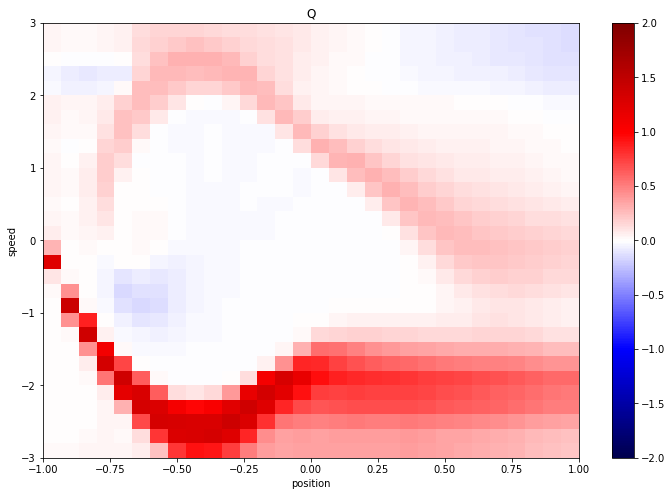

In [9]:
fig = plt.figure(figsize=(12,8))
show(get_q_grid(reg_et, n=resolution), 'Q', vmin=-2, vmax=2)

### Generated Policy

Shows what action is selected in each state.

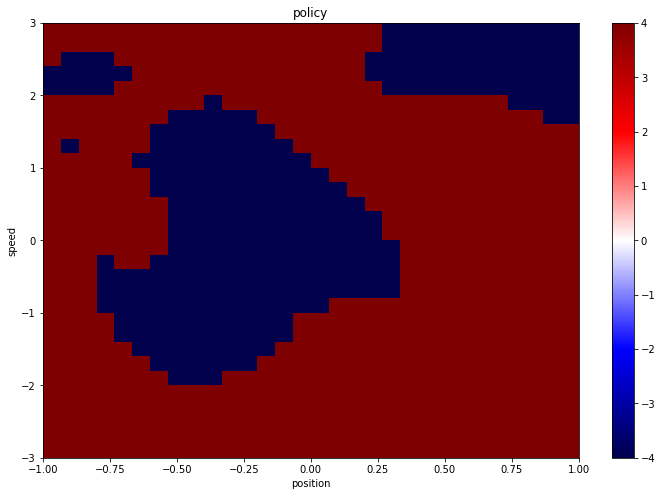

In [10]:
fig = plt.figure(figsize=(12,8))
show(get_policy_grid(reg_et, n=resolution), 'policy', vmin=-4, vmax=4)

### Policy Evaluation

Shows the score (discounted J) for each starting state.

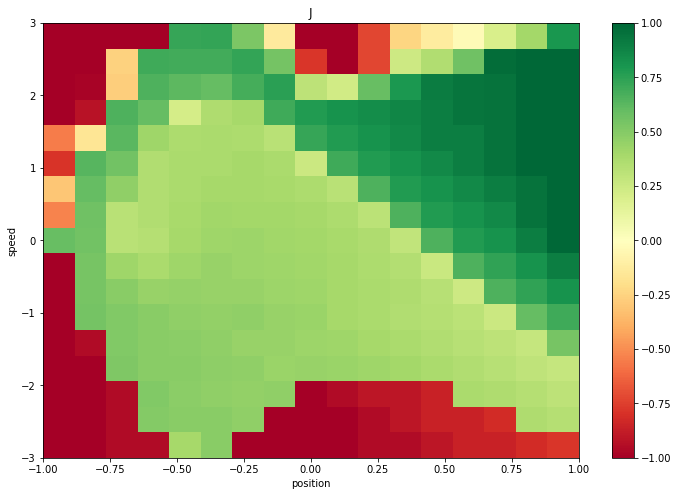

In [11]:
paths = glob.glob('fqi/extra_trees/experiment-*.h5')

fig = plt.figure(figsize=(12,8))
show(get_score_grid(paths), 'J', cmap='RdYlGn', vmin=-1, vmax=1)

## Neural Networks

In [12]:
df_fqi[np.char.startswith(data_fqi.path, 'nn')].sort_values(['performance', 'time'], ascending=[False, True])

,path,performance,time,p_conf,t_conf,p_std,t_std
6,nn4_2,0.100652,171.278658,0.035603,5.312611,0.081236,12.121795
11,nn4_ar,0.097290,529.416724,0.051852,19.616568,0.118311,44.759164
8,nn4_3,0.082154,204.767786,0.038878,5.494904,0.088708,12.537734
2,nn4_1,0.069897,184.167299,0.049451,5.625426,0.112833,12.835545
5,nn4_4,0.047437,165.082568,0.063387,5.524664,0.144631,12.605638
7,nn4_5,0.028349,191.603430,0.036442,5.906730,0.083151,13.477398
1,nn4,-0.008684,496.257259,0.034041,28.499182,0.077671,65.026641


### Base NN configuration (NN4)

* model = Sequential
* Dense(10, init=uniform, activation=tanh)
 - 3 input neurons (2 when using ActionRegressor)
* Dense(1, init=uniform, activation=linear)
* loss=mse, optimizer=rmsprop
* validation_split=0.1, nb_epoch=100, batch_size=100
* EarlyStopping(monitor=val_loss, min_delta=1e-3, patience=20)

### Configuration of other NNs

- **nn4_ar**: nn4 + ActionRegressor
- **nn4_1**: nn4_ar + batch_size=1k
- **nn4_2**: nn4_ar + batch_size=1k, val_split=0.3
- **nn4_3**: nn4_ar + batch_size=500, val_split=0.3
- **nn4_4**: nn4_2 + glorot_uniform x2
- **nn4_5**: nn4_2 + Dense(10, uniform)


## Sample Weight

In [13]:
df_fqi[np.char.startswith(data_fqi.path, 'sample')].sort_values(['performance', 'time'], ascending=[False, True])

,path,performance,time,p_conf,t_conf,p_std,t_std
13,sample_weight_ar,0.113221,1878.019048,0.026254,92.855308,0.059903,211.868144
4,sample_weight_orig_ar,0.004238,1722.493977,0.014230,81.929439,0.032468,186.938566
12,sample_weight,-0.001379,2330.232256,0.056218,136.753648,0.128272,312.031075


In [14]:
reg_sw = MeanRegressor(load_regressors(glob.glob('fqi/sample_weight_ar/experiment-*.h5')))
resolution = 900

### Q function

For each state s we plot Q(s, 4) - Q(s, -4)

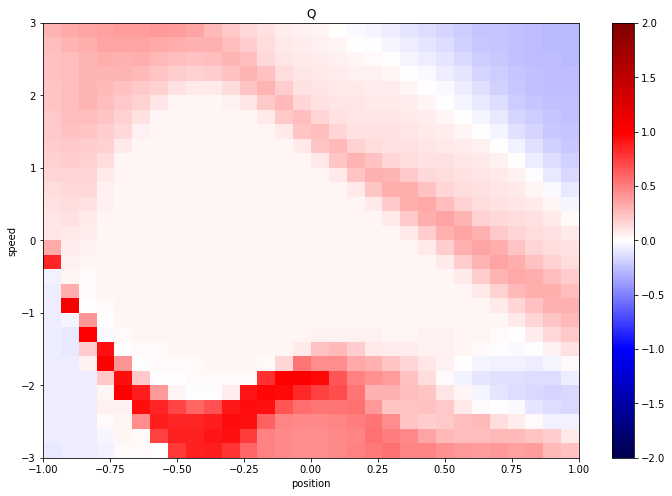

In [15]:
fig = plt.figure(figsize=(12,8))
show(get_q_grid(reg_sw, n=resolution), 'Q', vmin=-2, vmax=2)

### Generated Policy

Shows what action is selected in each state.

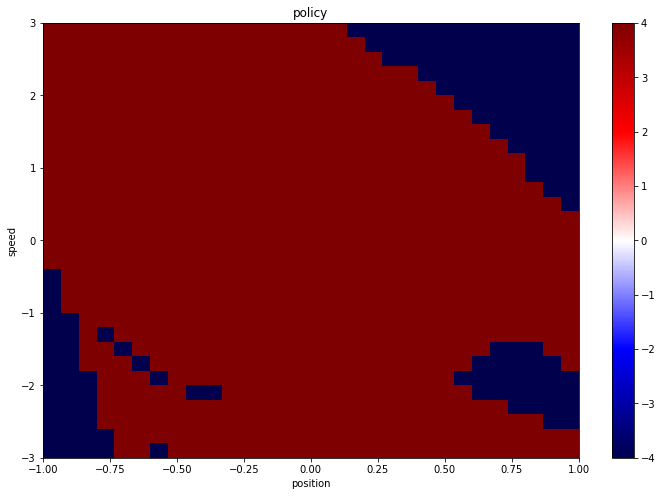

In [16]:
fig = plt.figure(figsize=(12,8))
show(get_policy_grid(reg_sw, n=resolution), 'policy', vmin=-4, vmax=4)

### Policy Evaluation

Shows the score (discounted J) for each starting state.

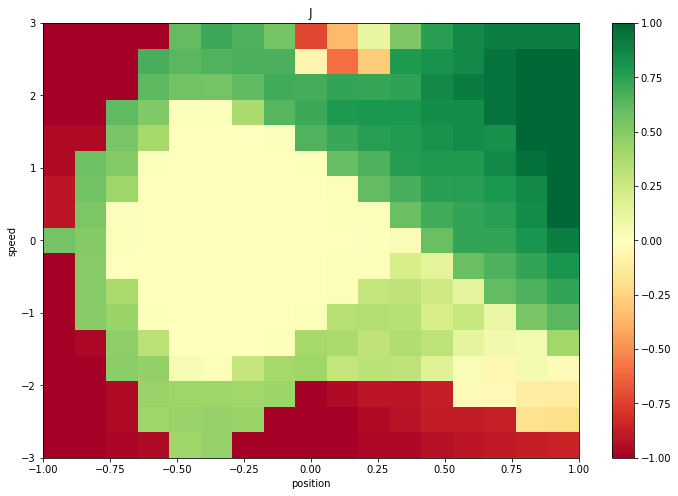

In [17]:
paths = glob.glob('fqi/sample_weight_ar/experiment-*.h5')

fig = plt.figure(figsize=(12,8))
grid = get_score_grid(paths)
show(grid, 'J', cmap='RdYlGn', vmin=-1, vmax=1)